In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('amazon_reviews.txt',delimiter='\t',header=None, names=['review','sentiment'])

In [5]:
#1 = Positive; 0 = Negative  
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## BERT pretrained models using hugging face

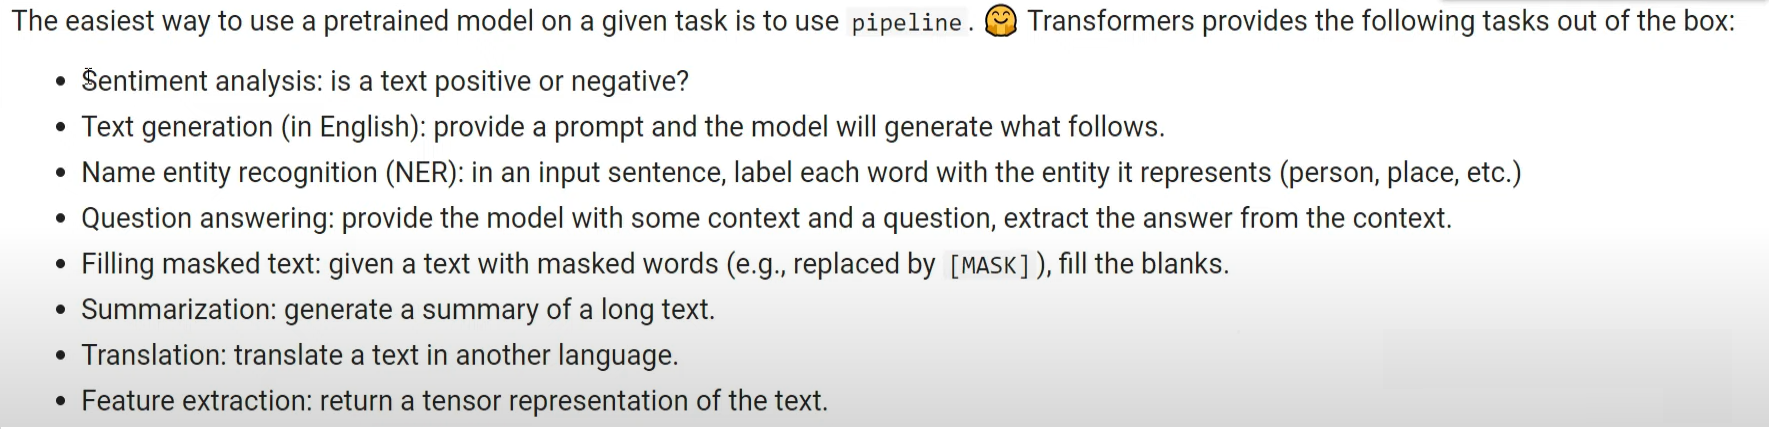

In [7]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [8]:
classifier('i am happy')

[{'label': 'POSITIVE', 'score': 0.9998801946640015}]

In [10]:
predicted = []
for i in range(len(df)):
    predicted.append(classifier(df.loc[i,'review']))

In [25]:
predicted_labels = []
for i in range (len(predicted)):
    if predicted[i][0]['label'] == 'NEGATIVE':
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)
        

In [27]:
df['predicted'] = predicted_labels

In [29]:
df.head()

,review,sentiment,predicted
0,So there is no way for me to plug it in here i...,0,0
1,"Good case, Excellent value.",1,1
2,Great for the jawbone.,1,1
3,Tied to charger for conversations lasting more...,0,0
4,The mic is great.,1,1


In [30]:
y_test = df['sentiment']
y_pred = df['predicted']

In [32]:
from sklearn.metrics import fbeta_score
fb = fbeta_score(y_test, y_pred, beta=1)
fb

0.9241658240647119

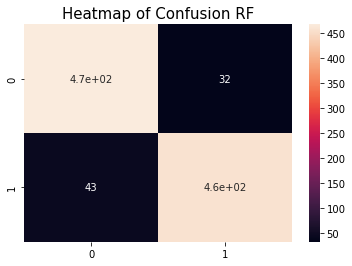

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion RF', fontsize = 15)
sns.heatmap(cm_rf, annot = True)
plt.show()

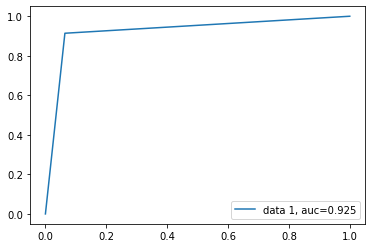

In [36]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()